In [1]:
# 3장  KNN
import seaborn as sns # seaborn을 불러오고 SNS로 축약함.
iris=sns.load_dataset('iris') # iris라는 변수명으로 Iris data를 download함.
print(iris.head()) # 최초의 5개의 관측치를 print

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


C:\Anaconda\envs\torch36\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


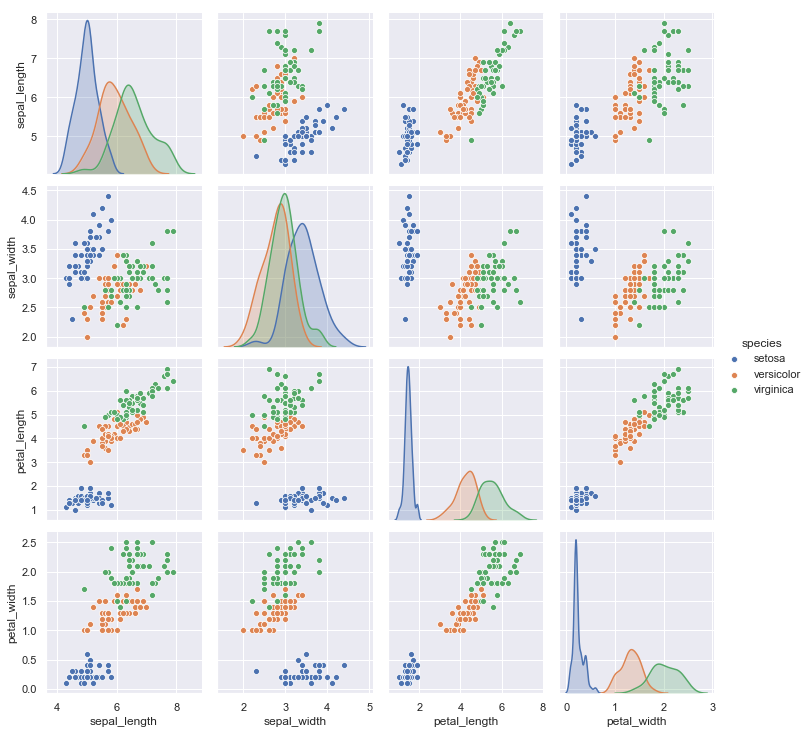

In [2]:
import seaborn as sns # seaborn 불러옴
sns.set() # seaborn style로 그림 그리기
sns.pairplot(iris,hue='species',size=2.5) # size는 그림 크기

In [5]:
print('total:', iris.shape) # iris data의 행과 열의 수

X = iris.drop('species', axis=1) # 'species'열을 drop하고 input X를 정의함.
print('X:', X.shape)

y=iris['species']               # 'species'열을 lavel y를 정의함.
print('y:', y.shape)

total: (150, 5)
X: (150, 4)
y: (150,)


In [7]:
iris['species'].values

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [8]:
iris['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder # LabelEncoder() method를 불러옴
import numpy as np # numpy를 불러옴

classle=LabelEncoder() # lbl encoder
y=classle.fit_transform(iris['species'].values) # species 열의 문자열은 categorical 값으로 전환
print('species labels:', np.unique(y)) # 중복되는 y 값을 하나로 정리하여 print

species labels: [0 1 2]


In [9]:
from sklearn.preprocessing import LabelEncoder # LabelEncoder() method를 불러옴
import numpy as np # numpy를 불러옴

classle=LabelEncoder() # lbl encoder
y=classle.fit_transform(iris['species']) # species 열의 문자열은 categorical 값으로 전환
print('species labels:', np.unique(y)) # 중복되는 y 값을 하나로 정리하여 print

species labels: [0 1 2]


In [5]:
yo=classle.inverse_transform(y) # 원래의 species 문자열로 전환
print('species:',np.unique(yo))

species: ['setosa' 'versicolor' 'virginica']


### Train Test Split
- `arrays` : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..)
- `test_size` : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)
- `train_size` : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)
- `random_state` : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력)
- `shuffle` : 셔플여부설정 (default = True)
- `stratify` : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.

In [10]:
from sklearn.model_selection import train_test_split  #Scikit-Learn 의 model_selection library를 train_test_split로 명명

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)   # x와 y의 data를 각각 30%, 70%의 비율로 test_set과 training_set으로 나눔

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [12]:
from sklearn.preprocessing import StandardScaler  #Scikit-Learn 의 model_selection library를 train_test_split로 명명

sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)    # training data의 표준화
X_test_std=sc.transform(X_test)      # test data의 표준화

#표준화된 data의 확인
print(X_train.head()) # X_train data 최초 5개의 관측치
X_train_std[1:5,] # X_train_std data 최초 5개의 관측치

     sepal_length  sepal_width  petal_length  petal_width
33            5.5          4.2           1.4          0.2
20            5.4          3.4           1.7          0.2
115           6.4          3.2           5.3          2.3
124           6.7          3.3           5.7          2.1
35            5.0          3.2           1.2          0.2


array([[-0.55053619,  0.76918392, -1.16537974, -1.30728421],
       [ 0.65376173,  0.30368356,  0.84243039,  1.44587881],
       [ 1.0150511 ,  0.53643374,  1.0655204 ,  1.18367281],
       [-1.03225536,  0.30368356, -1.44424226, -1.30728421]])

In [13]:
# KNN 의 적용
from sklearn.neighbors import KNeighborsClassifier  #KNN 불러오기

knn=KNeighborsClassifier(n_neighbors=5,p=2) #5개의 인접한이웃, 거리측정기준:유클리드 
knn.fit(X_train_std,y_train) #모델 fitting과정

KNeighborsClassifier()

In [14]:
y_train_pred=knn.predict(X_train_std) #train data의 y값 예측치
y_test_pred=knn.predict(X_test_std)  #모델을 적용한 test data의 y값 예측치
print('Misclassified training samples: %d' %(y_train!=y_train_pred).sum()) #오분류 데이터 갯수 확인
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum()) #오분류 데이터 갯수 확인

Misclassified training samples: 4
Misclassified test samples: 3


In [15]:
from sklearn.metrics import accuracy_score    #정확도 계산을 위한 모듈 import
print(accuracy_score(y_test,y_test_pred)) # 45개 test sample중 42개가 정확하게 분류됨.

0.9333333333333333


In [16]:
from sklearn.metrics import confusion_matrix#  오분류표 작성을 위한 모듈 import
conf=confusion_matrix(y_true=y_test,y_pred=y_test_pred) # 대각원소가 각각 setosa, versicolor, virginica를 정확하게 분류한 갯수.
print(conf)
 # setosa는 모두 정확하게 분류되었고 versicolor는 15개 중 2개가 virginica로 오분류 되었으며 virginica는 15개 중 1개가 versicolor로 오분류됨.

[[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]


In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [18]:
y_train_pred=knn.predict(X_train) #train data의 y값 예측치
y_test_pred=knn.predict(X_test)  #모델을 적용한 test data의 y값 예측치
print('Misclassified training samples: %d' %(y_train!=y_train_pred).sum()) #오분류 데이터 갯수 확인
print('Misclassified test samples: %d' %(y_test!=y_test_pred).sum()) #오분류 데이터 갯수 확인

Misclassified training samples: 2
Misclassified test samples: 1


In [19]:
print(accuracy_score(y_test,y_test_pred)) # 45개 test sample중 42개가 정확하게 분류됨.

0.9777777777777777


In [20]:
from sklearn.metrics import confusion_matrix#  오분류표 작성을 위한 모듈 import
conf=confusion_matrix(y_true=y_test,y_pred=y_test_pred) # 대각원소가 각각 setosa, versicolor, virginica를 정확하게 분류한 갯수.
print(conf)

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


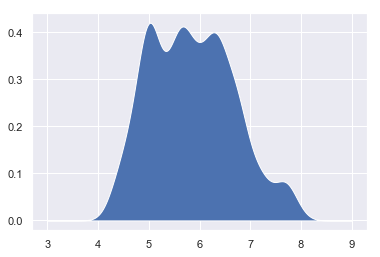

In [21]:
# Kernel density
import matplotlib.pyplot as plt #plot module import
import numpy as np              #numpy module import
xx=X['sepal_length'].values # Iris data의 첫번째 feature
xx=xx.T.reshape(-1, 1) # reshape
from sklearn.neighbors import KernelDensity
kd=KernelDensity(bandwidth=0.2, kernel='gaussian')
kd.fit(xx)
xx_d = np.linspace(3, 9, 1000)
logprob=kd.score_samples(xx_d.reshape(-1, 1)) # score_samples은 log probability 계산
plt.fill_between(xx_d, np.exp(logprob))